# Project Outline:
> Time line: This work must be completed in two days. 
    <br> > Day one: Data Acquisition and Preperation. Exploratory Analysis and Preprocessing. Evaluation.
    <br> > Day two: Modeling, 
1. Evaluate goals:
    - Find drivers for customer churn at Telcho. Why are customers churning?
    - Construct a ML classificatoin model that accurately predicts customer churn.
    - Present your process and findings to the lead data scientist.
2. Create initial questions: 
    - How often do people churn?
    - Is churn impacted by the type of service?
    - Is churn impacted by financial features?
3. Data Acquistion
    - Aqurie the data from the telco data set using designated function:
    - Make sure to endcode a .csv file or locate one if it already exists
4. Data Preparation
    - Clean the data:
5. Exploratory data analysis and statistical testing
6. Modeling
7. Evaluation

## Data Acquistion:

In [1]:
#acquire imports
import env
import os
import pandas as pd
import numpy as np

In [2]:
# get access to the telco data using a function:
def get_db_url(db, user= env.user, host=env.host, password=env.password):
    """
    This function will:
    - take credentials from env.py file
    - make a connection to the SQL database with given credentials
    - return url connection
    """
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
# given the connection url, aquire data:
def new_telco_data():
    '''
    This function will:
    - read a set sql query
    - return a dataframe based on the given query
    '''
    
    telco_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(telco_query, get_db_url('telco_churn'))
    
    return df

In [4]:
# given the creation of the dataframe, need to create a function for a csv file
def get_telco_data():
    '''
    This function will check for a telco.csv. 
    If it exists it will pull data from said file.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

In [5]:
# run the function to aquire data: 
telco = get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## Data Preperation:
1. Summarize our data:
    -head(), describe(), info(), isnull(), value_counts(), shape, ... <br>
    -plt.hist(), plt.boxplot()<br>
    -document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)<br>

2. Clean the data:
    -rename columns<br>
    -missing values: drop columns with too many missing values, drop rows with too many missing values, fill with zero where it makes sense, and then make note of any columns you want to impute missing values in (you will need to do that on split data).<br>
    -**outlier**: an observation point that is distant from other observations https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/<br>
        -ignore, drop rows, snap to a selected max/min value, create bins (cut, qcut)<br>
    -data errors: drop the rows/observations with the errors, correct them to what it was intended<br>
    -address text normalization issues: correct and standardize tex (e.g. deck 'C' 'c')<br>
    -creating new variables out of existing variables (e.g. z = x - y)<br>
3. Split the data:
    -split our data into train, validate and test sample dataframes<br>
    -why? overfitting: model is not generalizable. It fits the data you've trained it on "too well". 3 points does not necessarily mean a parabola.<br>
    -**train**: in-sample, explore, impute mean, scale numeric data (max() - min()...), fit our ml algorithms, evaluate our models.<br>
    -**validate**: out-of-sample confirm our top models have not overfit, evaluate our top models on unseen data. Using validate performance results, we pick the top 1 model.<br>
    -**test**: out-of-sample, how we expect our top model to perform in production, on unseen data in the future. ONLY USED ON 1 MODEL.

In [6]:
# summarize:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
# check for null values:
telco.isna().sum()[telco.isna().sum() > 0]

Series([], dtype: int64)

In [10]:
# remove duplicats:
pd.crosstab(telco.payment_type_id, telco.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
payment_type_id,,,,
1,0,0,2365,0
2,0,0,0,1612
3,1544,0,0,0
4,0,1522,0,0


In [11]:
pd.crosstab(telco.internet_service_type_id, telco.internet_service_type)

internet_service_type,DSL,Fiber optic,None
internet_service_type_id,,,
1,2421,0,0
2,0,3096,0
3,0,0,1526


Duplicates:
- payment_type_id = payment_type
- internet_service_type_id = internet_service_type
- contract_type_id = contract_type

In [12]:
pd.crosstab(telco.contract_type_id, telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [13]:
# drop the columns
telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)

In [14]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [9]:
# check for blank entires:
for col in telco.columns:
    value = telco[col].value_counts()
    print(value)

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: senior_citizen, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: phone_service, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                     3

Observations:
- total_charges is not a float.

In [15]:
# change total_charges into a float:
telco.loc[:,'total_charges'] = (telco.total_charges + '0')
telco.total_charges = telco.total_charges.astype(float)

In [18]:
# make sure that total_charges is now a float:
telco.total_charges.dtype

dtype('float64')

In [19]:
# create a function based on all the changes made above: 
def prep_telco_data(df):
    """
    This function will:
    - drop duplicate and unessasary columns
    - encode total_charges into a float
    """
    
    # Drop duplicate columns
    df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], inplace=True)
    
    #change total charges into a float
    telco.loc[:,'total_charges'] = (telco.total_charges + '0')
    telco.total_charges = telco.total_charges.astype(float)
    
    return df

In [29]:
# now that the data is clean the tata needs to be split into train, validate, and test.
from sklearn.model_selection import train_test_split

train_val, test = train_test_split( telco, train_size=0.8, stratify = telco.churn, random_state=1234)
train, val = train_test_split(train_val, train_size=0.7, stratify=train_val.churn, random_state=1234)
#train, val, test

In [30]:
# make it into a function:
def split_telco(df):
    """
    This function will:
    - take in a dataframe
    - preform a split on the data
    - stratify churn
    - return train, val(validate), and test
    """
    train_val, test = train_test_split( telco, train_size=0.8, stratify = telco.churn, random_state=1234)
    train, val = train_test_split(train_val, train_size=0.7, stratify=train_val.churn, random_state=1234)
    

##### Add all the functions created to `wrange.py`

In [32]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [45]:
# figure out the price agerage for dsl month to month charge or year charge

idea_one = telco[['monthly_charges','contract_type','internet_service_type', 'churn']]

In [44]:
idea_one_a = telco.groupby(['contract_type','internet_service_type','churn'])['monthly_charges'].mean()
idea_one_a

contract_type   internet_service_type  churn
Month-to-month  DSL                    No        51.931484
                                       Yes       46.617386
                Fiber optic            No        87.680228
                                       Yes       86.473322
                None                   No        20.462941
                                       Yes       20.180303
One year        DSL                    No        61.199033
                                       Yes       63.325472
                Fiber optic            No        98.092414
                                       Yes      101.653365
                None                   No        20.811408
                                       Yes       21.138889
Two year        DSL                    No        70.527679
                                       Yes       67.141667
                Fiber optic            No       104.560427
                                       Yes      104.712903
           

In [60]:
idea_one_a = pd.DataFrame(idea_one_a)
idea_one_a

monthly_charges
contract_type  internet_service_type churn                 
Month-to-month DSL                   No           51.931484
                                     Yes          46.617386
               Fiber optic           No           87.680228
                                     Yes          86.473322
               None                  No           20.462941
                                     Yes          20.180303
One year       DSL                   No           61.199033
                                     Yes          63.325472
               Fiber optic           No           98.092414
                                     Yes         101.653365
               None                  No           20.811408
                                     Yes          21.138889
Two year       DSL                   No           70.527679
                                     Yes          67.141667
               Fiber optic           No          104.560427
                                     Yes         104.712903
               None                  No           21.770063
                                     Yes          22.700000

In [57]:
pivot_df = idea_one_a.pivot_table(index='contract_type', columns=['internet_service_type', 'churn'], values='monthly_charges')

<Figure size 1200x800 with 0 Axes>

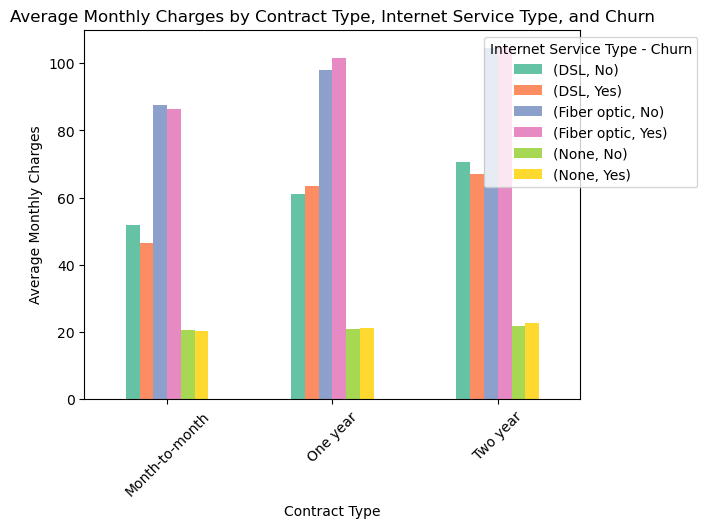

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set_palette("Set2")  # Set the color palette
pivot_df.plot(kind='bar')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Contract Type, Internet Service Type, and Churn')
plt.legend(title='Internet Service Type - Churn', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.show()